## CSV to `GeoDataFrame`

In [77]:
# Import libraries
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [78]:
# Diplau all columns 
pd.set_option('display.max.columns', None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

power_plants = power_plants.drop(columns='Unnamed: 0')
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Lets use the long and lat columns in the csv to create a geodataframe.
These indivate the location of the power plants in the NAD83 CRS (EPSG:4269).
We can use the `geopandas` function `points_from_xy()`

In [79]:
# Create points from lat and long
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)
points

<GeometryArray>
[ <POINT (-160.497 55.34)>,  <POINT (-87.357 33.459)>,
   <POINT (-88.01 31.007)>,  <POINT (-86.283 32.584)>,
 <POINT (-106.375 31.757)>,  <POINT (-87.781 32.602)>,
  <POINT (-86.052 33.784)>,   <POINT (-87.45 33.255)>,
  <POINT (-86.255 32.619)>,  <POINT (-86.338 33.426)>,
 ...
  <POINT (-80.124 35.396)>,   <POINT (-77.898 35.36)>,
  <POINT (-78.077 35.299)>,  <POINT (-78.077 35.299)>,
  <POINT (-80.652 35.556)>,   <POINT (-82.376 35.38)>,
  <POINT (-79.368 36.009)>,  <POINT (-79.736 35.273)>,
   <POINT (-73.91 42.877)>,  <POINT (-77.276 41.838)>]
Length: 12009, dtype: geometry

In [5]:
# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants, # Dataframe
                                geometry=points, # Specify geometry column
                                crs ='EPSG:4269') # Specify CR

In [6]:
print ('CRS', power_plants.crs)
print ('is CRS geographic: ', power_plants.crs.is_geographic)

CRS EPSG:4269
is CRS geographic:  True


<Axes: >

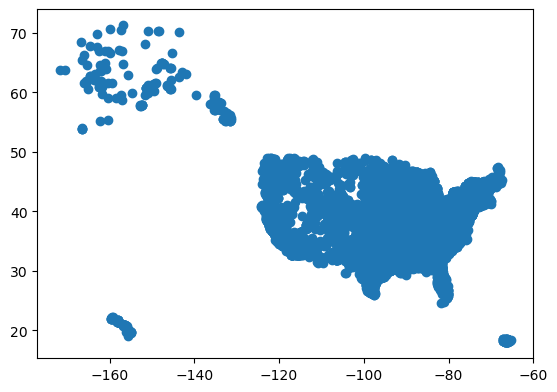

In [7]:
power_plants.plot()  

## F-string

so far, we have printed variables using string concatenation inside the print() funtcion: we use commas to separate every variabl and string that we want to print example:

In [8]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way to mix variables and strings in a print statement is by creating an **f-string**, stands for "formatted string".
The simplest syntax:

```python
f"sometext {replace}"
```
 Where `replace` can be a variable, na expression, a function, or method call.
 
 Example:

In [9]:
# Check what is the ellipsoid:
f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

# Use f-string inside the print function
print(f"datum: {power_plants.crs.datum}"

fstring can live on its own or be in print function

In [10]:
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


In [11]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:' :<25} {power_plants.crs.is_geographic}")
print(f"{'Is this projected?:' :<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is this projected?:       False


## Import shapefile 

In [12]:
# Os lets us see our working directory directly from our notebook
os.getcwd()

'/Users/overbye/MEDS/EDS-220/eds220-2024-in-class'

In [80]:
# Create an absolute file path 
# / indicates where we will start
fp = os.path.join('/',
                  'courses', 
                  'EDS220',
                  'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')
fp
states = gpd.read_file(fp)

# simplify column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

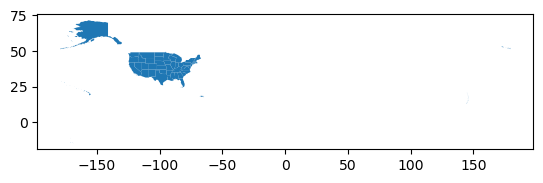

In [14]:
# IT IS SUPER IMPORTAANT TO LOOK IN CRS
print(states.crs)
states.plot()

`for` loops

They are bread and butter, super inmportant to be able to use.
It can be easier to work with th ecodes as numbers instead of strings, lets update the corresponding colunns in the geo-dataframe:
`region`, `division`, `satefp`

First thing, check if these are columns with strings

In [15]:
print(f"region is string dtypes? {is_string_dtype(states['region'])}")
print(f"division is string dtypes? {is_string_dtype(states['division'])}")
print(f"statefp is string dtypes? {is_string_dtype(states['statefp'])}")

region is string dtypes? True
division is string dtypes? True
statefp is string dtypes? True


In [16]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names.

**DRY code***

Dry = don't repeate yourself is a core program principle that encourages reducing redundancy and consolidating repeated logic
If you need to repeat the "Same" code more than twice, you probably need a `for` loop.

Next, update the data type of the code columns to be integers.
This time, we check the data type of the column using the `is_numeric_dtype()` and `assert` statement:

In [81]:
# Update code columns into integers 
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True`.
If the expression evaluates to `False` then `assert` raises and `AssertionError` and stops your code from running.


In [18]:
2 + 2 == 4

True

In [19]:
# Does nothing if statement is True 
assert 2 + 2 == 4

In [20]:
# Assert raises an error if the statement is false
assert 2 + 2 == 3

AssertionError: 

Assert is a way to check for erros in the code. This is how autograder works 

## Data selection

For this lesson, we want to use only the contigous states. The `states` geo-dataframe covers a bigger extension.

In [ ]:
states.plot()

## Check-in
- What are the unique values for region, division, or state codes in the data?
- Which codes should we select to keep only the states codes in the US?

In [82]:
# Check for unique values
states['region'].unique()


array([3, 2, 1, 4, 9])

In [ ]:
# This is how she did it in class
states.region.unique()

Hawaii and Alaska have codes 2, 15 and then region 9 should also be excluded. 

In [83]:
# Select continguous US states
contiguous = states [(states.region!=9) & (states.statefp.isin([2,15]))]

# Check if column values are in this list 
states.statefp.isin([2,15])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31     True
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
Name: statefp, dtype: bool

In [ ]:
# Tilda negates whole expression
~states.statefp.isin([2,15])

<Axes: >

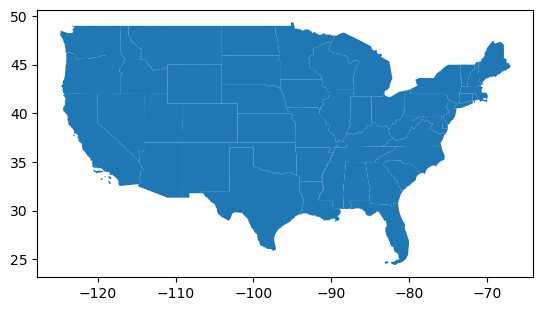

In [84]:
# Add a tilda to the whole statement to negate 
contiguous = states [(states.region!=9) & (~states.statefp.isin([2,15]))]
contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement.

Select the data in the `power_plants` data frame for the contiguous US states.

In [ ]:
# Select the data in the `power_plants` data frame for the contiguous US states.
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

# Plotting 

Before we plot our data we want to make sure they are in the same crs.

In [ ]:
# Check if the crs match
contiguous.crs == power_plants.crs

AttributeError: Line2D.set() got an unexpected keyword argument 'legend_kwds'

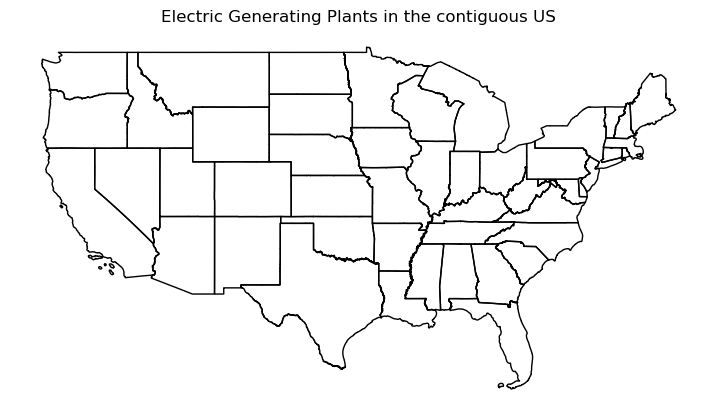

In [86]:
# For some reason, size is in inches 
fig, ax = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map
ax.axis('off')

ax.set_title('Electric Generating Plants in the contiguous US')

# kwds is keywords, it expects a dictionary
contiguous.plot(ax=ax,
                color='none',
                edgecolor='black')

# Add electric power plants colored by energy source

power_plants.plot(ax=ax,
                  column='primsource', # Color by values in this column
                  legend=True,
                  markersize=4, # Change the size of the dots
                  cmap='tab20', # Change color scheme of dots
                  alpha=0.5,
                  legend_kwds= {
                      'title':'Primary energy source',
                      'title_fontsize':'small',
                      'ncol':6,
                      'loc':'upper left',
                      'bbox_to_anchor':(0,0)
                  }
                 )

plt.show()

We controlled the legendlocation using `loc` andf `bboc_to_anchor` in the `legend_kwds` :

- `loc` indicates the **the conrner of the legend that we watnt to use for placements**
- `bboc_to_anchor` is a tuple with coordinates  indicating where to place the corner specified in `loc` relative to the aexes. Values between 0 and 1 are *inside* the axes


## `for` with `zip`

often we need to iterate simultanously over two lists (or iterables). 

`zip()` is a python function, that allows you to combine two lists so that you can interate over their elements in pairs.

So when used in a `for` loop it allows you to process elements of each list together.

Example:

In [21]:
# Irerate over a list

numbers = [1,2,3]
for num in numbers:
    print(num)

1
2.3


In [22]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2.3 b


Example: with `matplotlib`.
A common situation when code gets repeated when creating subplots.

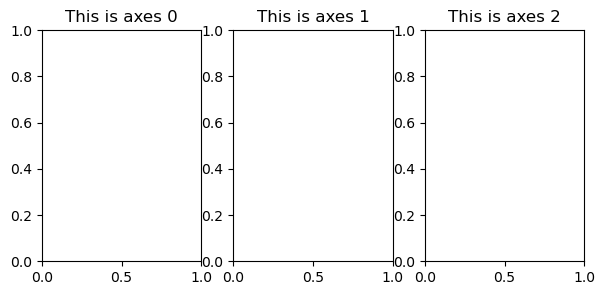

In [34]:
# Creating multiple plots, single row, 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title('This is axes 0')
axes[1].set_title('This is axes 1')
axes[2].set_title('This is axes 2')

plt.show()

In [25]:
# It is a list of axes 

axes

array([<Axes: title={'center': 'This is axes 0'}>,
       <Axes: title={'center': 'This is axes 1'}>,
       <Axes: title={'center': 'This is axes 2'}>], dtype=object)

## Check in

Use `for` and `zip` to create the same subplots and avoid redundancy 

<function matplotlib.pyplot.show(close=None, block=None)>

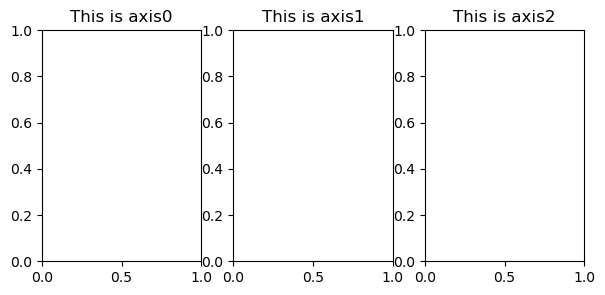

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

# Iterate over axes
for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axis{i}")
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

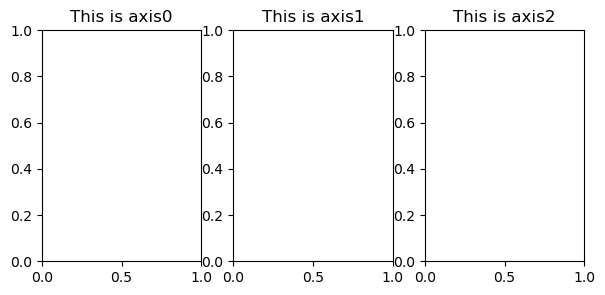

In [42]:
# Another solution, without zip
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

# Iterate over axes
for i in [0,1,2]:
    axes[i].set_title(f"This is axis{i}")
    
plt.show

In [43]:
# Remember we have been working with 2 datasets
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


In [44]:
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<Axes: >

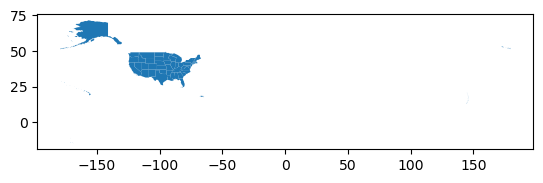

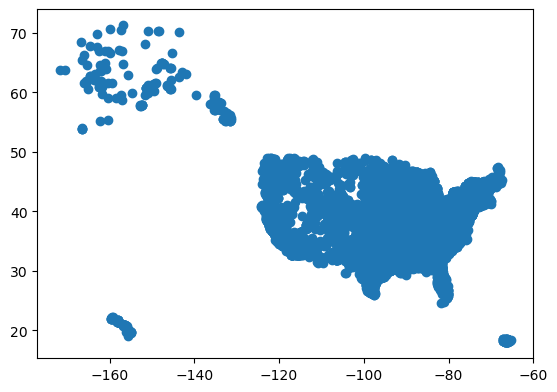

In [46]:
states.plot()
power_plants.plot()

## Exercise

1. select the power plants in california in a variable named ca power plants

2. Create a list named top_sources with californias top 3 electric sources

3. recreate the plot

In [72]:
# Select only power plants in california
ca_power_plants = power_plants[power_plants['state'] == 'California']

In [73]:
ca_power_plants

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)
74,11644,151,McClure,12745,Modesto Irrigation District,Electric Utility,639 S. McClure Rd.,Modesto,Stanislaus,California,95354.0,natural gas,"Natural Gas = 53.5 MW, Petroleum = 53.5 MW",Natural Gas Fired Combustion Turbine; Petroleu...,142.4,107.0,NaN,NaN,NaN,NaN,NaN,NaN,53.5,NaN,53.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.931390,37.629360,POINT (-120.93139 37.62936)
80,11650,161,Turlock Lake,19281,Turlock Irrigation District,Electric Utility,21642 Davis Road,Hickman,Stanislaus,California,95323.0,hydroelectric,Hydroelectric = 3.3 MW,Conventional Hydroelectric,3.3,3.3,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.594678,37.611461,POINT (-120.59468 37.61146)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,23500,66472,San Manuel Central Plant Cogens,65525,San Manuel Mission Band of Indians,Industrial CHP,777 San Manuel Blvd.,Highland,San Bernardino,California,92346.0,natural gas,Natural Gas = 5 MW,Natural Gas Internal Combustion Engine,5.4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.230250,34.151193,POINT (-117.23025 34.15119)
11942,23511,66492,Henry Miller RD,65537,Henry Miller Reclamation District,Commercial Non-CHP,7767 Santa Rita Grade,Dos Palos,Merced,California,93620.0,solar,Solar = 1.5 MW,Solar Photovoltaic,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.635230,37.054300,POINT (-120.63523 37.05430)
11944,23513,66500,Valley Center 85,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 85 MW,Batteries,85.0,85.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)
11946,23515,66502,Valley Center 54,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 54 MW,Batteries,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)


In [63]:
# Create a list with top sources

top_sources = list(power_plants['primsource'].value_counts()
                                .index[:3]
                                .tolist()
                                )

top_sources

['solar', 'natural gas', 'hydroelectric']

<Axes: >

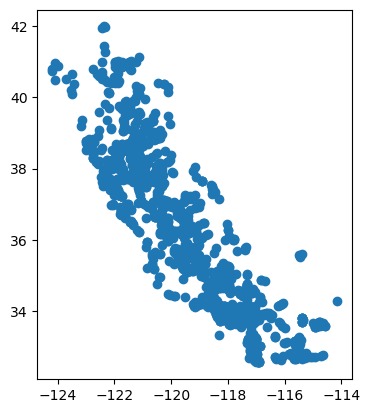

In [74]:
ca_power_plants.plot()

<Axes: >

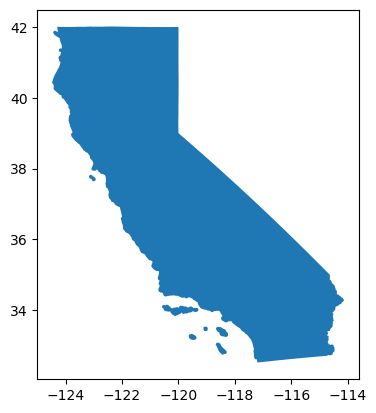

In [71]:
ca = states [(states['name'] == 'California')]

ca.plot()

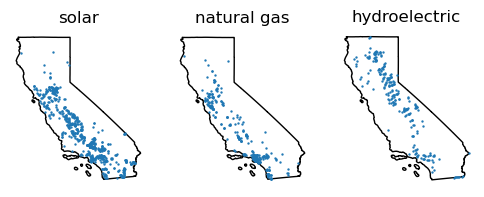

In [93]:
# Create plot

fig, axes = plt.subplots(nrows = 1, ncols =3, figsize = (6,3))

for ax, source in zip(axes, top_sources):
    ca.plot(ax=ax,
                     color='none')
    # Select points for the source
    subset = ca_power_plants[ca_power_plants.primsource == source]
    subset.plot(ax=ax, markersize=0.5)
    ax.set_title(source)
    ax.axis('off')

## Functions
What about the other states? We create a function!

Functions in python are blocks of reusable code deisgned to perform specific tasts and make your code more modular and organized 

Docstring talks about the function
the general syntax:

```python
def function_name(parameter_1, ..., paremeter_n):
    """Docstring"""
    <body of the function>
    return value # Depends on the function
```

Example:

A simple function with a one-line docstring and no return values.


In [98]:
# Create function

def greet():
    """Print a greeting message"""
    print('Hello, welcome to the class!')

greet()

Hello, welcome to the class!


Example 2:

A function with a more detailed docstring and a return value

In [104]:
# A function with a parameter 

def circle_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius(float): The radius of the circle 
    Returns:
        float: The area of the circle, calculated as pi * radius^2
    """
    area = 3.14159 * radius ** 2
    return area

circle_area(5)

78.53975

## Example

Going back to our power_plants data frames, let's create a function that will give us the top 3 primary sources for a given state

In [107]:
# We need to replace california with something else

def top3_sources(state):

    state_power_plants = power_plants[power_plants['state'] == state]
    top_sources = list(power_plants['primsource'].value_counts().index[:3].tolist())
    return top_sources

In [108]:
# Then it will fill it in 
top3_sources('New York')

['solar', 'natural gas', 'hydroelectric']